# Exercise - CNN Classification

The data set for this exercise contains rendered images of 16 different types of Lego bricks. This is an image classification task: build a model that can correctly identify lego bricks

## Goal

Use the LEGO folder on your computer (as part of the downloaded files). Use the **train** folder and build a model to predict the **category** of each image. Then, validate your model on the images in the **valid** folder. 

# Import libraries

In [6]:
#from __future__ import print_function
import tensorflow as tf
import tensorflow.keras as keras

import numpy as np
from tensorflow.keras.preprocessing.image import ImageDataGenerator, DirectoryIterator
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Activation, Flatten
from tensorflow.keras.layers import Conv2D, MaxPooling2D
import os

# Readers

In [7]:
#Image Data Generator manipulates and "augments" images

train_datagen = ImageDataGenerator(rescale=1/255)


# Directory Iterator reads images from a directory

train_data = DirectoryIterator(
    directory="LEGO/train",
    image_data_generator = train_datagen,
    target_size=(16, 16),                    ###### ENTER values for XXX ########
    color_mode="rgb",
    batch_size=100,
    class_mode="categorical",
    shuffle=True,
    seed=42)

Found 6379 images belonging to 16 classes.


In [8]:
valid_datagen = ImageDataGenerator(rescale=1/255)

valid_data = DirectoryIterator(
    directory="LEGO/valid",
    image_data_generator = valid_datagen,
    target_size=(16, 16),                     ###### ENTER values for XXX ########
    color_mode="rgb",
    batch_size=100,
    class_mode="categorical",
    shuffle=True,
    seed=42)

Found 1555 images belonging to 16 classes.


# Build your model 

**Be careful with the output layer: number of neurons must match the number of categories to predict**

In [9]:
model = Sequential()

model.add(Conv2D(filters=16, kernel_size=(3, 3), padding='same', activation='relu', 
                 input_shape=(16,16,3)))

#model.add(Conv2D(filters=16, kernel_size=(3, 3), activation='relu'))

model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(rate=0.25))

#model.add(Conv2D(filters=32, kernel_size=(3, 3), padding='same', activation='relu'))

model.add(Conv2D(filters=32, kernel_size=(3, 3), activation='relu'))

model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(rate=0.25))

model.add(Flatten())

model.add(Dense(128, activation='relu'))
model.add(Dropout(rate=0.5))

#### FIXED!!!!!!!
model.add(Dense(16, activation='softmax'))

model.summary()

# initiate adam optimizer
opt = tf.keras.optimizers.Adam(learning_rate=0.01)

# Let's train the model using RMSprop
model.compile(loss='categorical_crossentropy',
              optimizer=opt,
              metrics=['accuracy'])

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_2 (Conv2D)           (None, 16, 16, 16)        448       
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 8, 8, 16)         0         
 2D)                                                             
                                                                 
 dropout_3 (Dropout)         (None, 8, 8, 16)          0         
                                                                 
 conv2d_3 (Conv2D)           (None, 6, 6, 32)          4640      
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 3, 3, 32)         0         
 2D)                                                             
                                                                 
 dropout_4 (Dropout)         (None, 3, 3, 32)         

In [10]:
model.fit(
        train_data,
        epochs=10,
        validation_data=valid_data,
        )

Epoch 1/10
64/64 [==============================] - 19s 272ms/step - loss: 2.0248 - accuracy: 0.2659 - val_loss: 1.2125 - val_accuracy: 0.5717
Epoch 2/10
64/64 [==============================] - 16s 258ms/step - loss: 1.3854 - accuracy: 0.4639 - val_loss: 0.9375 - val_accuracy: 0.6309
Epoch 3/10
64/64 [==============================] - 16s 255ms/step - loss: 1.2423 - accuracy: 0.5151 - val_loss: 0.9915 - val_accuracy: 0.6199
Epoch 4/10
64/64 [==============================] - 16s 254ms/step - loss: 1.1614 - accuracy: 0.5415 - val_loss: 0.8483 - val_accuracy: 0.6592
Epoch 5/10
64/64 [==============================] - 16s 255ms/step - loss: 1.1145 - accuracy: 0.5603 - val_loss: 0.8695 - val_accuracy: 0.6817
Epoch 6/10
64/64 [==============================] - 16s 255ms/step - loss: 1.0890 - accuracy: 0.5648 - val_loss: 0.7921 - val_accuracy: 0.6720
Epoch 7/10
64/64 [==============================] - 16s 254ms/step - loss: 1.0499 - accuracy: 0.5828 - val_loss: 0.7464 - val_accuracy: 0.7170

# Predict a single image

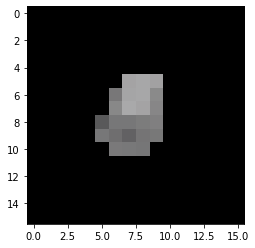

In [11]:
from tensorflow.keras.preprocessing.image import load_img
from tensorflow.keras.preprocessing.image import img_to_array
from matplotlib import pyplot as plt


img = load_img("LEGO/valid/3713 Bush for Cross Axle/201706171506-0006.png",
               color_mode='rgb',
               target_size=(16,16)
              )


plt.imshow(img)

In [12]:
#Convert the image to array
single_image = img_to_array(img)

#Also divide the image values by 255 to normalize
img_rank4 = np.expand_dims(single_image/255, axis=0)

model.predict(img_rank4)

1/1 [==============================] - 0s 219ms/step


array([[4.2342991e-03, 9.5023923e-03, 5.2290089e-10, 1.4928494e-08,
        2.5491800e-09, 3.1572137e-02, 2.4579922e-06, 5.8376536e-05,
        1.9879360e-01, 6.4142034e-05, 7.3034236e-05, 1.0543300e-04,
        4.2006787e-02, 7.1340024e-01, 1.8716726e-04, 6.7747221e-09]],
      dtype=float32)

In [13]:
np.round(model.predict(img_rank4),2)

1/1 [==============================] - 0s 43ms/step


array([[0.  , 0.01, 0.  , 0.  , 0.  , 0.03, 0.  , 0.  , 0.2 , 0.  , 0.  ,
        0.  , 0.04, 0.71, 0.  , 0.  ]], dtype=float32)

In [14]:
# We can predict the class directly using the following function:

np.argmax(model.predict(img_rank4), axis=-1)

1/1 [==============================] - 0s 43ms/step


array([13], dtype=int64)

In [15]:
# We can retrieve the class labels from the train_generator:

label_map = (train_data.class_indices)

label_map

{'11214 Bush 3M friction with Cross axle': 0,
 '18651 Cross Axle 2M with Snap friction': 1,
 '2357 Brick corner 1x2x2': 2,
 '3003 Brick 2x2': 3,
 '3004 Brick 1x2': 4,
 '3005 Brick 1x1': 5,
 '3022 Plate 2x2': 6,
 '3023 Plate 1x2': 7,
 '3024 Plate 1x1': 8,
 '3040 Roof Tile 1x2x45deg': 9,
 '3069 Flat Tile 1x2': 10,
 '32123 half Bush': 11,
 '3673 Peg 2M': 12,
 '3713 Bush for Cross Axle': 13,
 '3794 Plate 1X2 with 1 Knob': 14,
 '6632 Technic Lever 3M': 15}

In [16]:
# We can retrieve the class label of the prediction:

list(label_map.keys())[np.argmax(model.predict(img_rank4), axis=-1)[0]]

1/1 [==============================] - 0s 44ms/step


'3713 Bush for Cross Axle'